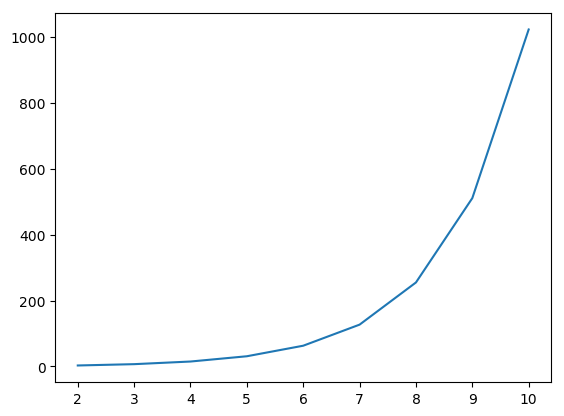

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.reset_defaults()
from scipy import special

plt.plot(range(2,11),[sum(special.binom(k,1+j) for j in range(k)) for k in range(2,11)])

## make_classification

In [36]:
X_train = np.load("/home/fede/projects_local/secoc/data/X_train.npy")
X_test = np.load("/home/fede/projects_local/secoc/data/X_test.npy")
y_test = np.load("/home/fede/projects_local/secoc/data/y_test.npy")
y_train = np.load("/home/fede/projects_local/secoc/data/y_train.npy")

In [37]:
y_tr = np.where(y_train)[1]

In [4]:
import numpy as np

from secoc import estimator; reload(estimator)
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit


X,y = make_classification(n_classes=3, n_clusters_per_class=1, n_features=20, n_samples=200, n_informative=5)

train_index, test_index = next(StratifiedShuffleSplit(n_splits=1, train_size=100, test_size=100).split(X,y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [47]:
reload(estimator)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

tr_score, ts_score = [], []

est = estimator.SlidingECOC(
    LogisticRegression(), n_estimators_window=100, window_size=5,
    oob_score=True, code_size=500, single_seed_features=0, circular_features=True, random_state=None,
    n_estimators=None, stride=2, max_features=.9, max_samples=1.,
    bootstrap_features=True, bootstrap=True, verbose=1, n_jobs=-1).fit(X_train, y_train)

You are about to generate 100 estimators for 10 windows, for a total of 1000 estimators.


[Parallel(n_jobs=16)]: Done   2 out of  16 | elapsed:    0.4s remaining:    2.7s
[Parallel(n_jobs=16)]: Done  16 out of  16 | elapsed:    0.8s finished


In [48]:
clf = KNeighborsClassifier(metric='hamming', n_jobs=-1, algorithm='brute')
code_range = map(int, np.logspace(2, 4, 100))
# code_range = map(int, [100])

for code_size in code_range:
    
    y_pred = est.predict(X_train, classifier=clf, code_size=code_size)
    tr_score.append(accuracy_score(y_train, y_pred))
    
    y_pred = est.predict(X_test, classifier=clf, code_size=code_size)
    ts_score.append(accuracy_score(y_test, y_pred))

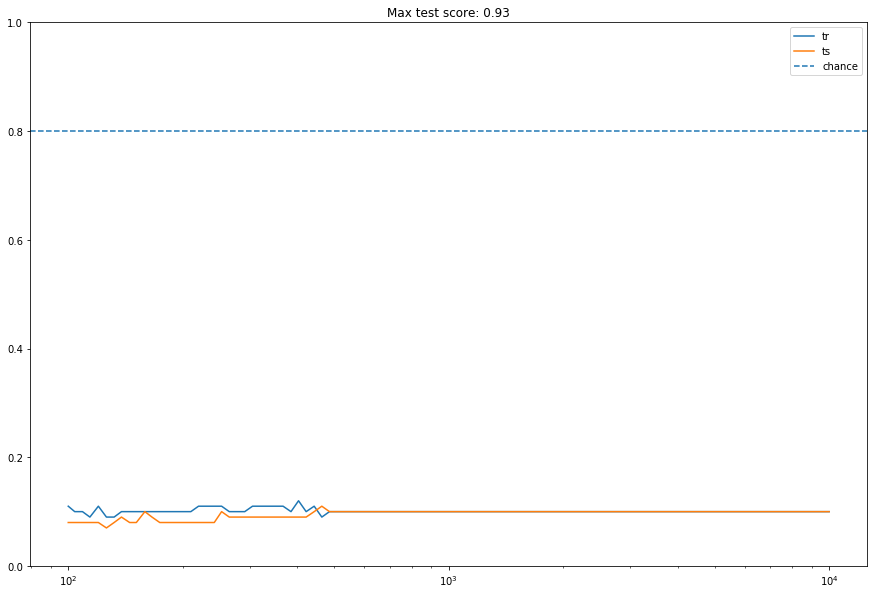

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.semilogx(code_range, 1- np.array(tr_score), label="tr")
plt.semilogx(code_range, 1- np.array(ts_score), label="ts")
# plt.axvline(x=1000)
# plt.axvline(x=50)

plt.axhline(0.8, ls='--', label='chance')
plt.ylim([0,1])
plt.legend()
plt.title("Max test score: %.2f" % np.max(ts_score))
plt.show()

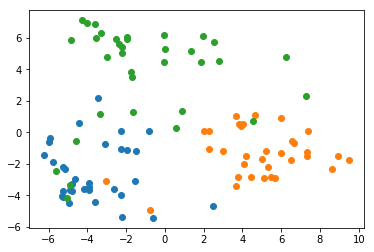

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

pca = PCA(n_components=2)

y = y_train

tr = pca.fit_transform(est.encode(X_train))
for yy in np.unique(y):
    plt.plot(tr[y == yy,0],tr[y==yy,1], 'o')
plt.show()

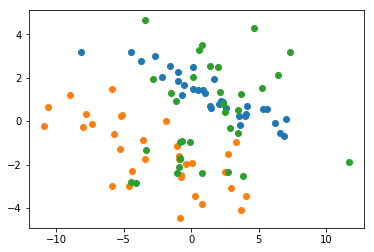

In [51]:
pca = PCA(n_components=2)

tr = pca.fit_transform(X_train)
for yy in np.unique(y):
    plt.plot(tr[y == yy,0],tr[y==yy,1], 'o')
plt.show()